In [74]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import seaborn as sns
from tensorflow.keras.datasets import mnist


sns.set()

## Exercise 1: Predict credit card defaults (5p)

In this exercise the topic is to create a model that predicts probability of a credit card payment default based on 23 attributes about the customers. Dataset containing historical information is in file ccdefaults.csv. See https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients for more information about the dataset.

Load data (use for example numpy function genfromtxt()), scale it, and divide into training and validation sets. Think about the size of the validation set - perhaps 40% is more samples that absolutely needed?

Create two models: 
* model_simple is a one-layer network (ie. ~ logistic regression)
* model_complex is 5-10 layer network with enough width

Plot model training and validation accuracies vs epoch to compare their behaviour.

Can you achieve more accuracy with complex model? How much more? 

In [8]:
file = r'default of credit card clients.xls'

data = pd.read_excel(file)
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
data['Y'].describe()

count     30001
unique        3
top           0
freq      23364
Name: Y, dtype: int64

In [12]:
data.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [32]:
newdata = data.drop(data.index[[0]],axis = 0)
newdata = newdata.drop(['Unnamed: 0'],axis = 1)
newdata

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [46]:
newdata.dtypes

X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
X11    object
X12    object
X13    object
X14    object
X15    object
X16    object
X17    object
X18    object
X19    object
X20    object
X21    object
X22    object
X23    object
Y      object
dtype: object

In [51]:
newdata = newdata.astype(int)

In [52]:
newdata.dtypes

X1     int32
X2     int32
X3     int32
X4     int32
X5     int32
X6     int32
X7     int32
X8     int32
X9     int32
X10    int32
X11    int32
X12    int32
X13    int32
X14    int32
X15    int32
X16    int32
X17    int32
X18    int32
X19    int32
X20    int32
X21    int32
X22    int32
X23    int32
Y      int32
dtype: object

In [53]:
X = np.array(newdata.drop(['Y'],1))
y = np.array(newdata['Y'])
y

array([1, 1, 0, ..., 1, 1, 1])

In [54]:
scaler = StandardScaler().fit(X)
scaled_x = scaler.transform(X)
scaled_x

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [55]:
X_train, X_val, Y_train, Y_val = train_test_split(scaled_x, y, test_size=0.4, random_state=42)


print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(18000, 23) (12000, 23) (18000,) (12000,)


In [56]:
model = Sequential([
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
h = model.fit(X_train, Y_train, epochs=100, batch_size=4, validation_data=(X_val, Y_val))

Epoch 1/100
4500/4500 [==============================] - 2s 512us/step - loss: 0.4915 - accuracy: 0.7954 - val_loss: 0.4669 - val_accuracy: 0.8136
Epoch 2/100
4500/4500 [==============================] - 2s 470us/step - loss: 0.4689 - accuracy: 0.8118 - val_loss: 0.4644 - val_accuracy: 0.8100
Epoch 3/100
4500/4500 [==============================] - 2s 464us/step - loss: 0.4687 - accuracy: 0.8109 - val_loss: 0.4642 - val_accuracy: 0.8094
Epoch 4/100
4500/4500 [==============================] - 2s 464us/step - loss: 0.4682 - accuracy: 0.8090 - val_loss: 0.4675 - val_accuracy: 0.8069
Epoch 5/100
4500/4500 [==============================] - 2s 469us/step - loss: 0.4683 - accuracy: 0.8096 - val_loss: 0.4661 - val_accuracy: 0.8108
Epoch 6/100
4500/4500 [==============================] - 2s 461us/step - loss: 0.4680 - accuracy: 0.8104 - val_loss: 0.4661 - val_accuracy: 0.7979
Epoch 7/100
4500/4500 [==============================] - 2s 466us/step - loss: 0.4680 - accuracy: 0.8101 - val_loss: 0

4500/4500 [==============================] - 2s 475us/step - loss: 0.4682 - accuracy: 0.8103 - val_loss: 0.4667 - val_accuracy: 0.8103
Epoch 57/100
4500/4500 [==============================] - 2s 470us/step - loss: 0.4681 - accuracy: 0.8079 - val_loss: 0.4649 - val_accuracy: 0.8086
Epoch 58/100
4500/4500 [==============================] - 2s 470us/step - loss: 0.4680 - accuracy: 0.8099 - val_loss: 0.4645 - val_accuracy: 0.8088
Epoch 59/100
4500/4500 [==============================] - 2s 471us/step - loss: 0.4684 - accuracy: 0.8109 - val_loss: 0.4641 - val_accuracy: 0.8087
Epoch 60/100
4500/4500 [==============================] - 2s 469us/step - loss: 0.4682 - accuracy: 0.8101 - val_loss: 0.4653 - val_accuracy: 0.8061
Epoch 61/100
4500/4500 [==============================] - 2s 469us/step - loss: 0.4681 - accuracy: 0.8103 - val_loss: 0.4663 - val_accuracy: 0.8123
Epoch 62/100
4500/4500 [==============================] - 2s 469us/step - loss: 0.4681 - accuracy: 0.8105 - val_loss: 0.4658 

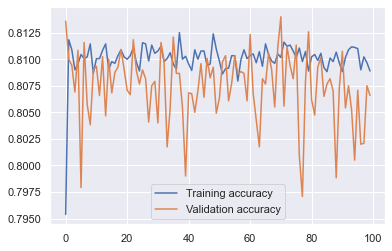

In [73]:
plt.plot(h.history['accuracy'], label='Training accuracy')
plt.plot(h.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [68]:
model2 = Sequential([
    Dense(50, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='tanh'),
    Dense(100, activation='relu'),
    Dense(100, activation='tanh'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
h1 = model2.fit(X_train, Y_train, epochs=100, batch_size=4, validation_data=(X_val, Y_val))

Epoch 1/100
4500/4500 [==============================] - 3s 633us/step - loss: 0.4615 - accuracy: 0.8091 - val_loss: 0.4442 - val_accuracy: 0.8102
Epoch 2/100
4500/4500 [==============================] - 3s 615us/step - loss: 0.4415 - accuracy: 0.8172 - val_loss: 0.4364 - val_accuracy: 0.8156
Epoch 3/100
4500/4500 [==============================] - 3s 608us/step - loss: 0.4355 - accuracy: 0.8197 - val_loss: 0.4364 - val_accuracy: 0.8169
Epoch 4/100
4500/4500 [==============================] - 3s 613us/step - loss: 0.4310 - accuracy: 0.8208 - val_loss: 0.4355 - val_accuracy: 0.8163
Epoch 5/100
4500/4500 [==============================] - 3s 613us/step - loss: 0.4279 - accuracy: 0.8220 - val_loss: 0.4404 - val_accuracy: 0.8177
Epoch 6/100
4500/4500 [==============================] - 3s 615us/step - loss: 0.4250 - accuracy: 0.8227 - val_loss: 0.4397 - val_accuracy: 0.8121
Epoch 7/100
4500/4500 [==============================] - 3s 612us/step - loss: 0.4233 - accuracy: 0.8239 - val_loss: 0

4500/4500 [==============================] - 3s 620us/step - loss: 0.3221 - accuracy: 0.8602 - val_loss: 0.5729 - val_accuracy: 0.7947
Epoch 57/100
4500/4500 [==============================] - 3s 625us/step - loss: 0.3182 - accuracy: 0.8616 - val_loss: 0.6019 - val_accuracy: 0.7738
Epoch 58/100
4500/4500 [==============================] - 3s 626us/step - loss: 0.3205 - accuracy: 0.8619 - val_loss: 0.5683 - val_accuracy: 0.7816
Epoch 59/100
4500/4500 [==============================] - 3s 623us/step - loss: 0.3172 - accuracy: 0.8631 - val_loss: 0.5776 - val_accuracy: 0.7875
Epoch 60/100
4500/4500 [==============================] - 3s 622us/step - loss: 0.3114 - accuracy: 0.8668 - val_loss: 0.5789 - val_accuracy: 0.7857
Epoch 61/100
4500/4500 [==============================] - 3s 627us/step - loss: 0.3065 - accuracy: 0.8676 - val_loss: 0.6098 - val_accuracy: 0.7757
Epoch 62/100
4500/4500 [==============================] - 3s 619us/step - loss: 0.3059 - accuracy: 0.8691 - val_loss: 0.6075 

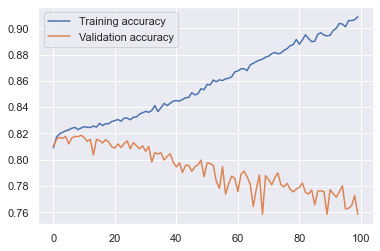

In [71]:
plt.plot(h1.history['accuracy'], label='Training accuracy')
plt.plot(h1.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

## Exercise 2: MNIST classification metrics (5p)

Create 1) a one-layer and b) a deep network model with dense layers to classify MNIST digits. You can use the examples notebook models as basis and modify them if you want to. Plot the training and validation accuracies for both models over training epochs. 

Compute suitable metrics for both models (see last slides of session03.pdf) and compare their performance. You can find their implementations in sklearn.metrics package.

Analyse both models with the confusion matrix. You can find confusion matrix implementation in sklearn.metrics package.

In [104]:
(x_train, y_train),(x_val, y_val) = mnist.load_data()

#Get test data
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

x_train = train_x.reshape(-1, 28 * 28).astype('float32') / 255.0
x_val = x_val.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = test_x.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train_cat = keras.utils.to_categorical(train_y)
y_val_cat = keras.utils.to_categorical(y_val)

In [106]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [107]:
h3 = model3.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/50
563/563 [==============================] - 0s 642us/step - loss: 1.1832 - acc: 0.7320 - val_loss: 0.7453 - val_acc: 0.8393
Epoch 2/50
563/563 [==============================] - 0s 501us/step - loss: 0.6628 - acc: 0.8482 - val_loss: 0.5670 - val_acc: 0.8687
Epoch 3/50
563/563 [==============================] - 0s 496us/step - loss: 0.5509 - acc: 0.8666 - val_loss: 0.4957 - val_acc: 0.8762
Epoch 4/50
563/563 [==============================] - 0s 505us/step - loss: 0.4973 - acc: 0.8745 - val_loss: 0.4552 - val_acc: 0.8855
Epoch 5/50
563/563 [==============================] - 0s 492us/step - loss: 0.4645 - acc: 0.8801 - val_loss: 0.4293 - val_acc: 0.8880
Epoch 6/50
563/563 [==============================] - 0s 551us/step - loss: 0.4417 - acc: 0.8848 - val_loss: 0.4101 - val_acc: 0.8930
Epoch 7/50
563/563 [==============================] - 0s 491us/step - loss: 0.4248 - acc: 0.8881 - val_loss: 0.3962 - val_acc: 0.8953
Epoch 8/50
563/563 [==============================] - 0s 496us

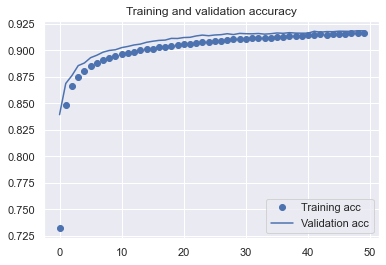

In [108]:
acc = h3.history['acc']
val_acc = h3.history['val_acc']
loss = h3.history['loss']
val_loss = h3.history['val_loss']

plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


In [127]:
test = model3.predict(x_test)
prediction1 = np.argmax(test, axis=1)

In [128]:
confusion_matrix(test_y,prediction1)

array([[2276,    0,    7,    6,    6,   18,   18,    3,   27,    3],
       [   1, 2584,   12,   12,    3,   15,    3,    5,   30,    7],
       [  12,   26, 2060,   28,   35,    9,   42,   40,   57,   13],
       [   6,    9,   66, 2177,    1,   93,   13,   28,   60,   31],
       [   3,   11,   17,    1, 2156,    1,   29,    5,   15,   96],
       [  31,   19,   20,   73,   17, 1933,   30,   10,   61,   21],
       [  15,    7,   15,    0,   29,   27, 2304,    3,   14,    2],
       [  13,   24,   43,    9,   26,    4,    0, 2318,    5,   74],
       [  11,   51,   28,   54,   15,   57,   29,    8, 2023,   29],
       [  12,    7,   16,   33,   80,   13,    0,   72,   20, 2119]],
      dtype=int64)

In [113]:
test

array([[1.6304333e-05, 4.8314887e-06, 7.4751279e-07, ..., 9.9074531e-01,
        7.3032209e-04, 4.7282469e-03],
       [4.1155425e-05, 1.6019261e-06, 6.6088469e-05, ..., 4.6887834e-07,
        4.6050214e-04, 1.0775397e-04],
       [4.8597899e-04, 1.0112467e-03, 1.2305363e-03, ..., 3.4918001e-05,
        9.0980059e-01, 4.8571005e-03],
       ...,
       [7.1768125e-05, 3.9082405e-04, 5.9041441e-03, ..., 7.6129534e-03,
        7.6752864e-02, 1.9547495e-01],
       [5.1478213e-03, 1.2152385e-06, 6.9734488e-06, ..., 4.7466081e-02,
        6.6824392e-03, 1.4294902e-03],
       [5.4803882e-02, 9.8873919e-04, 7.6082334e-02, ..., 2.2576124e-04,
        5.6972783e-02, 8.7114197e-05]], dtype=float32)

b)

In [116]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Dense(40, input_shape=(28 * 28,), activation='relu'))
model4.add(keras.layers.Dense(20, activation='relu'))
model4.add(keras.layers.Dense(20, activation='relu'))
model4.add(keras.layers.Dense(20, activation='relu'))
model4.add(keras.layers.Dense(20, activation='sigmoid'))
model4.add(keras.layers.Dense(20, activation='relu'))
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 40)                31400     
_________________________________________________________________
dense_45 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_46 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_47 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_48 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_49 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_50 (Dense)             (None, 10)              

In [118]:
model4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
h3 = model4.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/50
563/563 [==============================] - 0s 802us/step - loss: 2.2986 - acc: 0.1152 - val_loss: 2.2907 - val_acc: 0.1328
Epoch 2/50
563/563 [==============================] - 0s 608us/step - loss: 2.2703 - acc: 0.1874 - val_loss: 2.2240 - val_acc: 0.2853
Epoch 3/50
563/563 [==============================] - 0s 609us/step - loss: 2.0899 - acc: 0.2449 - val_loss: 1.9587 - val_acc: 0.2432
Epoch 4/50
563/563 [==============================] - 0s 608us/step - loss: 1.8722 - acc: 0.2844 - val_loss: 1.7715 - val_acc: 0.3610
Epoch 5/50
563/563 [==============================] - 0s 601us/step - loss: 1.6229 - acc: 0.4572 - val_loss: 1.4427 - val_acc: 0.5280
Epoch 6/50
563/563 [==============================] - 0s 602us/step - loss: 1.2706 - acc: 0.6055 - val_loss: 1.0935 - val_acc: 0.6610
Epoch 7/50
563/563 [==============================] - 0s 627us/step - loss: 0.9653 - acc: 0.7154 - val_loss: 0.8458 - val_acc: 0.7715
Epoch 8/50
563/563 [==============================] - 0s 666us

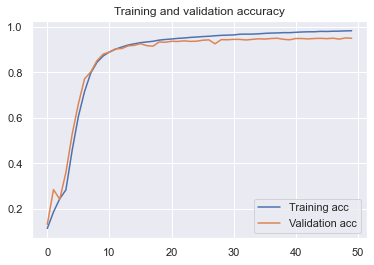

In [119]:
plt.plot(h3.history['acc'], label='Training acc')
plt.plot(h3.history['val_acc'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [122]:
pred = model4.predict(x_test)
pred

array([[1.12952967e-03, 1.01584420e-12, 1.38310401e-03, ...,
        9.93640244e-01, 1.18662179e-07, 3.84629238e-03],
       [7.11034076e-08, 2.73878174e-03, 2.50875106e-04, ...,
        1.14213217e-08, 9.49515379e-04, 7.56113423e-06],
       [3.66455843e-09, 1.99485105e-03, 1.33704061e-05, ...,
        2.14459237e-06, 9.92046356e-01, 3.10667069e-03],
       ...,
       [5.04084073e-06, 2.38117354e-05, 2.60771376e-05, ...,
        9.79908276e-04, 4.09522327e-03, 9.89415646e-01],
       [1.08410525e-08, 1.45200209e-03, 3.76182516e-06, ...,
        4.87149253e-12, 1.09039138e-05, 2.47345988e-09],
       [2.82504033e-07, 1.06970337e-03, 4.64064760e-05, ...,
        1.75427201e-10, 6.34375683e-05, 4.77948277e-08]], dtype=float32)

In [125]:
prediction = np.argmax(pred, axis=1)

In [129]:
confusion_matrix(test_y,prediction)

array([[2279,    1,   17,    3,    2,    2,   32,    8,   13,    7],
       [   0, 2590,    4,   23,    8,   14,    0,    3,   23,    7],
       [   9,    2, 2200,   29,    3,    5,   11,   31,   28,    4],
       [   0,    6,   49, 2320,    1,   47,    4,   10,   29,   18],
       [   2,    6,    5,    0, 2224,   11,   13,    1,    4,   68],
       [   9,    4,    8,   48,    3, 2104,   14,    0,   15,   10],
       [  11,    0,    6,    0,    9,   30, 2356,    0,    4,    0],
       [   9,    1,   43,    6,    5,    1,    0, 2390,   10,   51],
       [   3,   23,   28,   47,    6,   33,    4,    1, 2123,   37],
       [   5,    4,    4,   28,   43,    6,    2,   35,   28, 2217]],
      dtype=int64)